In [662]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor,Lasso, Ridge
from sklearn.metrics import mean_squared_error , mean_absolute_error
df=pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [663]:
df.shape

(4600, 18)

In [664]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [665]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [666]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [667]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [668]:
(df['price']==0).sum()

49

In [669]:
df['price']

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [670]:
df['price'].fillna(df['price'].mean())

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [671]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [672]:
df.duplicated().sum()

0

In [673]:
df.drop_duplicates()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [674]:
df['date']=pd.to_datetime(df['date'])

In [675]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [676]:
df['date'].value_counts()

date
2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2014-07-09    121
             ... 
2014-06-07      4
2014-07-06      3
2014-07-04      2
2014-05-11      2
2014-05-17      1
Name: count, Length: 70, dtype: int64

In [677]:
df['year']=df['date'].dt.year

In [678]:
df['month']=df['date'].dt.month

In [679]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year,month
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,5
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,5
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,5
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,5


In [680]:
df['street'].value_counts()

street
2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: count, Length: 4525, dtype: int64

In [681]:
df['sqft_above'].value_counts()

sqft_above
1200    47
1010    47
1300    45
1140    44
1320    43
        ..
2481     1
560      1
2437     1
3590     1
2538     1
Name: count, Length: 511, dtype: int64

In [682]:
df['country'].value_counts()

country
USA    4600
Name: count, dtype: int64

In [683]:
df['statezip'].value_counts()

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

In [684]:
df['city'].value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

In [685]:
df.drop(columns=['city','sqft_above','statezip','country','street'],inplace=True)

In [686]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,year,month
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,0,1955,2005,2014,5
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,280,1921,0,2014,5
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,0,1966,0,2014,5
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,0,2014,5
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,800,1976,1992,2014,5


In [687]:
df.drop('date',axis=1,inplace=True)

In [688]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,year,month
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,0,1955,2005,2014,5
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,280,1921,0,2014,5
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,0,1966,0,2014,5
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,0,2014,5
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,800,1976,1992,2014,5


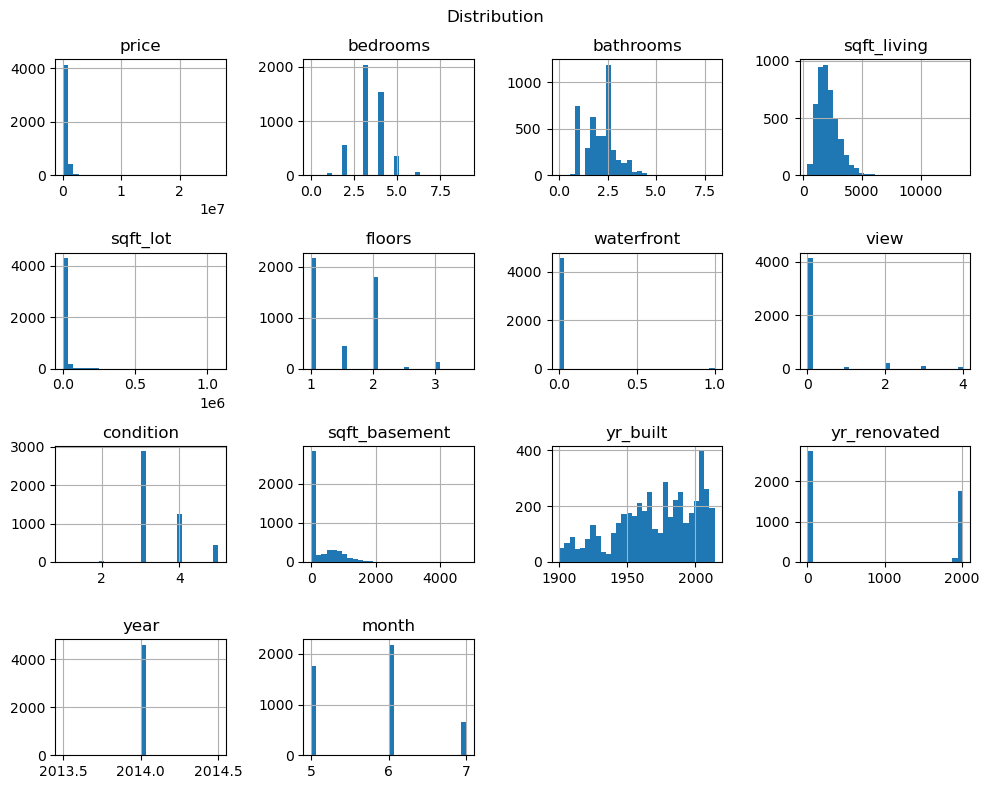

In [689]:
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(bins=30,figsize=(10,8))
plt.suptitle('Distribution')
plt.tight_layout()
plt.show()

In [690]:
df['price'].skew()

24.790932561757053

In [691]:
df['bedrooms'].skew()

0.4564466330191457

In [692]:
df['bathrooms'].skew()

0.6160327233508812

In [693]:
df['sqft_living'].skew()

1.723513270622118

In [694]:
df['price']=np.log(df['price']+1)
df['sqft_living']=np.log(df['sqft_living']+1)

In [695]:
df['price'].skew()

-7.55601299523719

In [696]:
df['sqft_living'].skew()

-0.048761381889750675

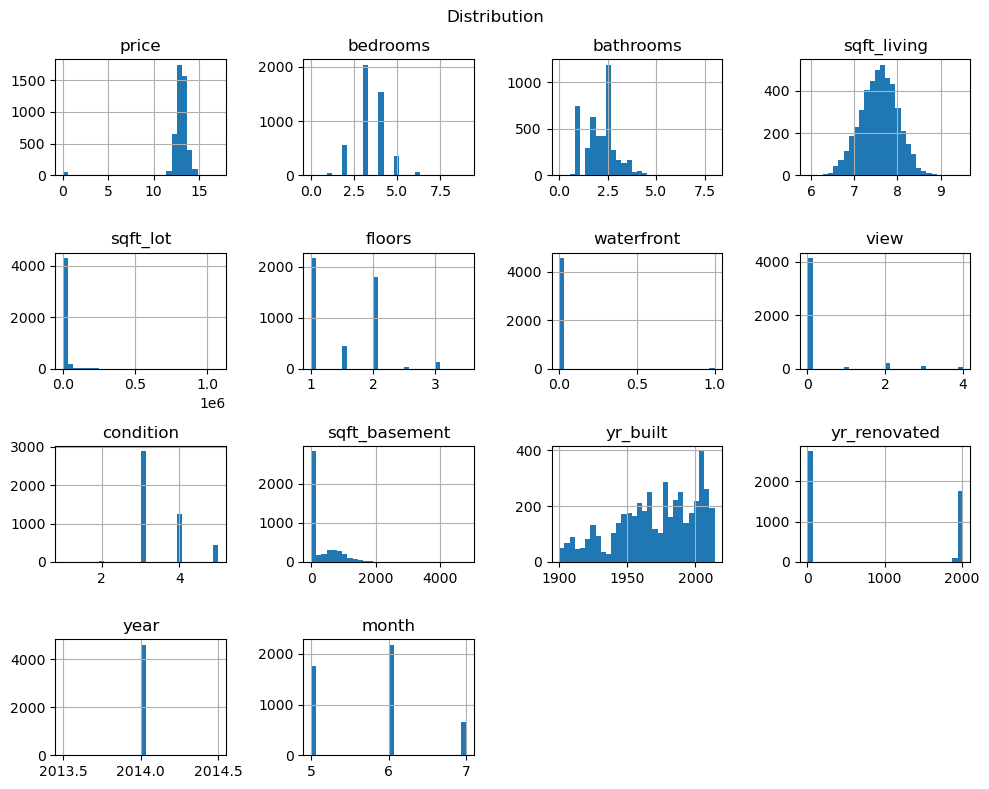

In [697]:
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(bins=30,figsize=(10,8))
plt.suptitle('Distribution')
plt.tight_layout()
plt.show()

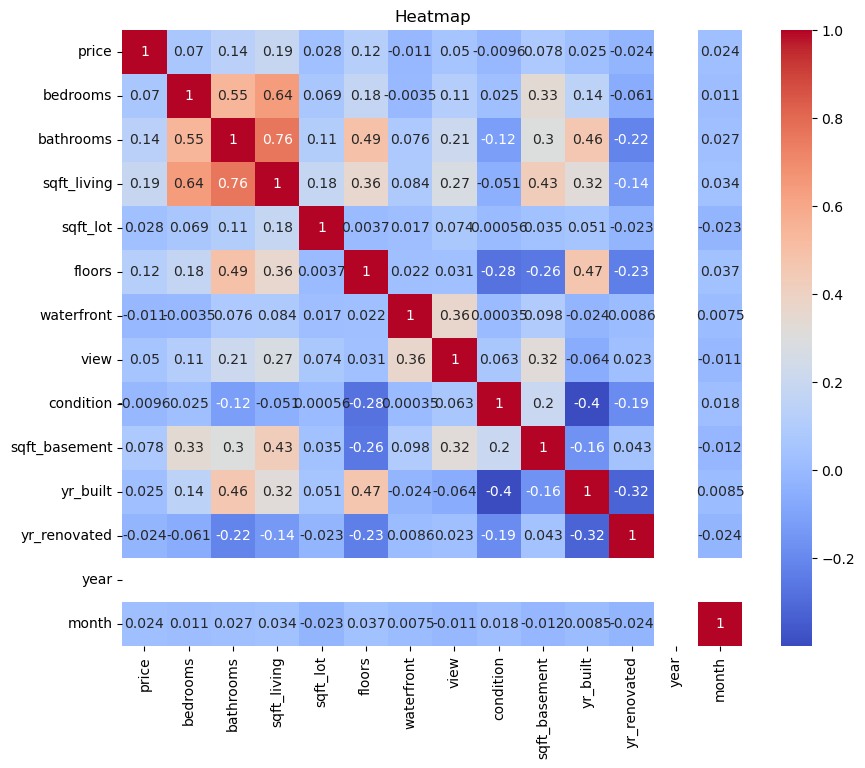

In [698]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Heatmap')
plt.show()

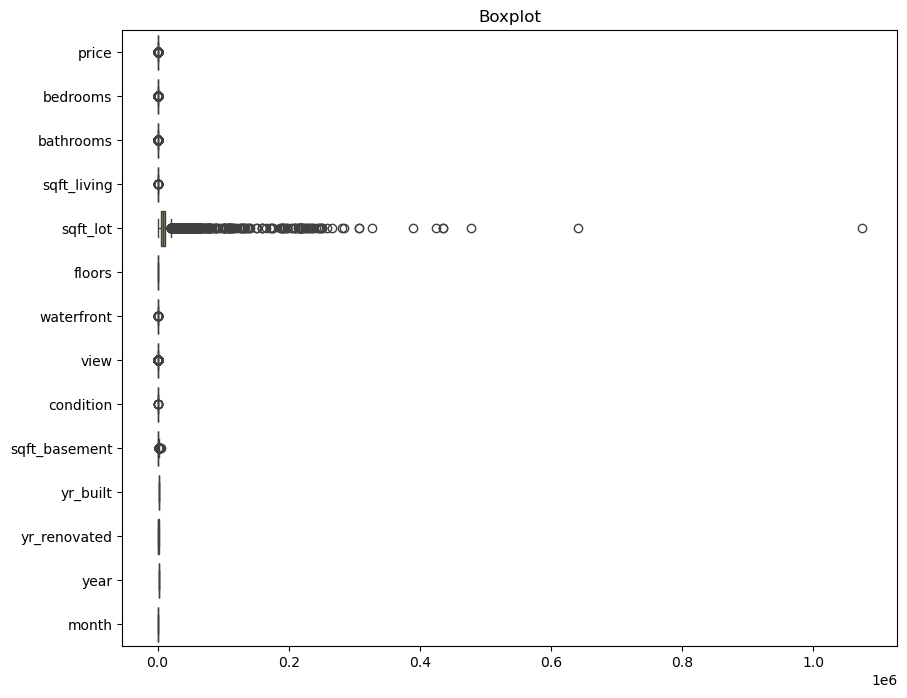

In [699]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,orient='h')
plt.title('Boxplot')
plt.show()

In [700]:
df.drop('sqft_lot',axis=1,inplace=True)

In [701]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,year,month
0,12.653962,3.0,1.50,7.201171,1.5,0,0,3,0,1955,2005,2014,5
1,14.684291,5.0,2.50,8.202756,2.0,0,4,5,280,1921,0,2014,5
2,12.742569,3.0,2.00,7.565793,1.0,0,0,4,0,1966,0,2014,5
3,12.948012,3.0,2.25,7.601402,1.0,0,0,4,1000,1963,0,2014,5
4,13.217675,4.0,2.50,7.570959,1.0,0,0,4,800,1976,1992,2014,5


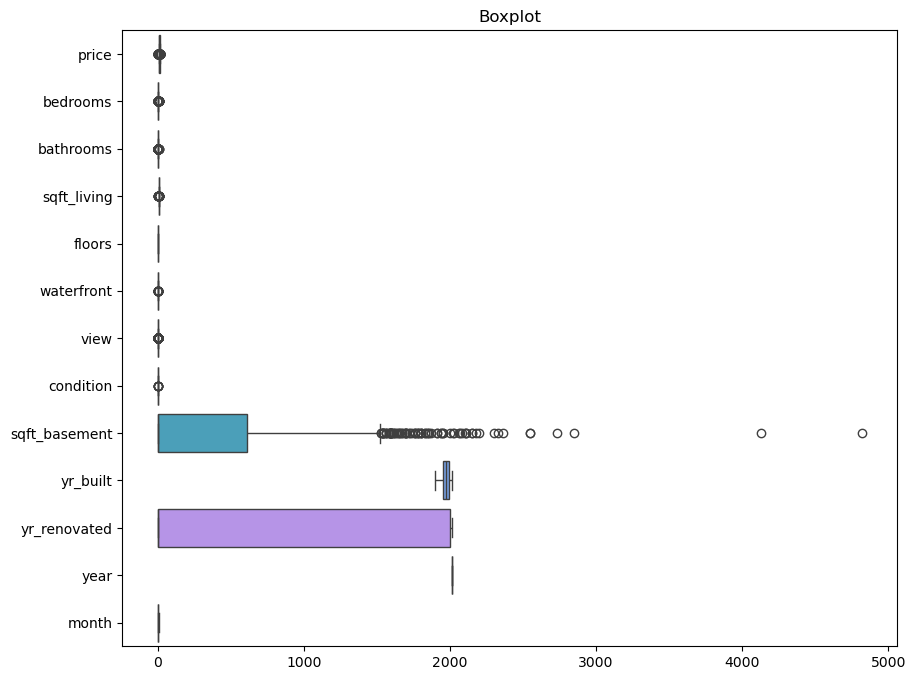

In [702]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,orient='h')
plt.title('Boxplot')
plt.show()

In [703]:
df['total_rooms']=(df['bedrooms']+df['bathrooms']).astype(int)
df['house_age']=2025-df['yr_built']
df['is_renovated']=(df['yr_renovated']>0).astype(int)
df['luxury']=(df['bedrooms']*4+df['bathrooms']*2+df['view']+df['waterfront'])
df['price_per_sqft']=df['price']/df['sqft_living']
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,year,month,total_rooms,house_age,is_renovated,luxury,price_per_sqft
0,12.653962,3.0,1.50,7.201171,1.5,0,0,3,0,1955,2005,2014,5,4,70,1,15.0,1.757209
1,14.684291,5.0,2.50,8.202756,2.0,0,4,5,280,1921,0,2014,5,7,104,0,29.0,1.790165
2,12.742569,3.0,2.00,7.565793,1.0,0,0,4,0,1966,0,2014,5,5,59,0,16.0,1.684234
3,12.948012,3.0,2.25,7.601402,1.0,0,0,4,1000,1963,0,2014,5,5,62,0,16.5,1.703372
4,13.217675,4.0,2.50,7.570959,1.0,0,0,4,800,1976,1992,2014,5,6,49,1,21.0,1.745839


In [704]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated',
       'year', 'month', 'total_rooms', 'house_age', 'is_renovated', 'luxury',
       'price_per_sqft'],
      dtype='object')

In [705]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
import joblib

num_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
           'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated',
           'year', 'month', 'total_rooms', 'house_age', 'is_renovated', 'luxury',
           'price_per_sqft']

scaler = StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Model Evaluation:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Model Evaluation:
MSE: 0.16199939535020766
MAE: 0.05128210821106503
R² Score: 0.8272437578394941


In [706]:
joblib.dump(model, "house_price_model.joblib")
joblib.dump(scaler, "scaler.joblib")
joblib.dump(X.columns.tolist(), "feature_names.joblib")

['feature_names.joblib']